<a href="https://colab.research.google.com/github/JungseoChoi/CJSbioinformatics/blob/main/bioinformatics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# anaconda 환경 불러오기

In [37]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 267.00 KiB/s, done.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.profile
./root/.tmux.conf
./root/.vimrc
--2023-06-06 05:40:09--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M  32.5MB/s    in 2.1s    

2023-06-06 05:40:12 (32.5 

In [38]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27 14:53 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27 14:53 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11 11:02 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11 11:03 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11 11:02 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27 14:53 gencode.gtf
-r-------- 1 root root   24065406 Apr 27 15:15 read-counts.txt
-r-------- 1 root root        751 Apr 27 15:15 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27 14:54 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27 14:53 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27 14:54 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27 14:54 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27 14:54 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27 14:54 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27 14:54 RPF-siLin28a.bam
-r-------- 1 r

In [39]:
!conda install -y subread

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::llvm-openmp==16.0.5=h4dfa4b3_0
  - conda-forge/linux-64::libzlib==1.2.13=h166bdaf_4
  - conda-forge/linux-64::zstd==1.5.2=h8a70e8d_1
  - bioconda/linux-64::subread==2.0.3=he4a0461_3
/ - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults co

In [40]:
%cd /content/drive/MyDrive/binfo1-project
!cp ../binfo1-datapack1/*.* .

/content/drive/MyDrive/binfo1-project


In [41]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 7 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7g.bam                                   ||
||                           RNA-control.bam                     

In [42]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0


In [43]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN


In [44]:
# 최소 10 이상의 read count를 가진 행들만 선택
filtered_data = cnts[(cnts['CLIP-35L33G.bam'] >= 10) &
                     (cnts['RNA-control.bam'] >= 10) &
                     (cnts['RPF-siLin28a.bam'] >= 10) &
                     (cnts['RNA-siLin28a.bam'] >= 10) &
                     (cnts['RPF-siLuc.bam'] >= 10) &
                     (cnts['RNA-siLuc.bam'] >= 10)]
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,95,93,100,42,75,1.926316,0.602151
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418


In [45]:
cnts['gene_id'] = cnts.index.to_series().str.split('.').str[0]
filtered_data = cnts
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000102693
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000064842
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN,ENSMUSG00000051951
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN,ENSMUSG00000102851
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000103377


In [46]:
# 'gene_id' 열만 선택하여 새로운 데이터프레임 생성
subset = filtered_data[['gene_id']] 
subset.to_csv('output_gene_id.txt', sep='\t', index=False)

# Uniprot에서 Ensemble을 기준으로 matching을 시킨다음 tsv파일로 불러왔음.

In [47]:
# 가져온 tsv파일을 이용해 파일 읽기
GO_term = pd.read_csv('GO_term.tsv', sep='\t', index_col=0)
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names
From,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4


In [48]:
# From column을 gene_id을 추가
GO_term['gene_id'] = GO_term.index.to_series()
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names,gene_id
From,,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a,ENSMUSG00000025903
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1,ENSMUSG00000025903
...,...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2,ENSMUSG00000064345
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1,ENSMUSG00000064351
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4,ENSMUSG00000064363


In [49]:
merged_GO = pd.merge(filtered_data, GO_term, on='gene_id')
merged_GO

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Entry,Gene Ontology (GO),Entry Name,Gene Names
0,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
3,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,chrM,3914,4951,+,1038,269,0,1253,3021,3012,2975,2156,0.214685,1.375759,ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
17911,chrM,5328,6872,+,1545,533,0,16638,50576,39430,21253,17355,0.032035,0.954724,ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
17912,chrM,10167,11544,+,1378,373,0,2150,5028,4224,3292,2498,0.173488,1.107123,ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4
17913,chrM,11742,13565,+,1824,3665,0,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUSG00000064367,P03921,mitochondrial inner membrane [GO:0005743]; mit...,NU5M_MOUSE,Mtnd5 mt-Nd5 Nd5


In [50]:
#merged_GO에서 원하는 column만 보이게 하고, NaN으로 표시된 GO term 행은 삭제.
subsets_GO = merged_GO[['gene_id', 'clip_enrichment', 'rden_change', 'Gene Ontology (GO)']].set_index('gene_id')
subsets_GO = subsets_GO.dropna(subset=['Gene Ontology (GO)'])
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface [GO:0009986]; cytoplasm [GO:00057...
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
...,...,...,...
ENSMUSG00000064345,0.214685,1.375759,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064351,0.032035,0.954724,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064363,0.173488,1.107123,mitochondrial inner membrane [GO:0005743]; mit...


In [51]:
# Gene ontology (GO)에서 [GO:0009986]을 없애기
import re
pattern = re.compile(r'\s*\[GO:\d+\]\s*' )
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.replace(pattern, '')
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface; cytoplasm; cytosol; endoplasmic ...
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
...,...,...,...
ENSMUSG00000064345,0.214685,1.375759,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064351,0.032035,0.954724,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064363,0.173488,1.107123,mitochondrial inner membrane; mitochondrial re...


In [52]:
# Gene ontology (GO)에서 ';'을 기준으로 새로운 행으로 만들기 ##여기서 너무 많은 행이 생김.단순화 할 수 있는 방법이 없을까?
subsets_GO = subsets_GO.assign(**{'Gene Ontology (GO)': subsets_GO['Gene Ontology (GO)'].str.split(';')}).explode('Gene Ontology (GO)')
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.strip() # 앞 뒤로 공백 있는 것 제거.
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [53]:
# 공백 제대로 제거 되었는지 확인
filtered_subsets_GO = subsets_GO.groupby('Gene Ontology (GO)').filter(lambda x: len(x) >= 10)
filtered_subsets_GO['Gene Ontology (GO)'].value_counts()

nucleus                                            4255
cytoplasm                                          3834
membrane                                           2274
cytosol                                            2105
nucleoplasm                                        1889
                                                   ... 
nuclear replication fork                             10
monoatomic ion transport                             10
regulation of actin cytoskeleton reorganization      10
Tat protein binding                                  10
centrosome duplication                               10
Name: Gene Ontology (GO), Length: 2351, dtype: int64

In [ ]:
#GO_term에 따라 clip-enrichment값과 rden_change값이 Mann-Whitney U test를 통해 제대로 차이가 있는 것인지 확인.
import scipy.stats as stats

filtered_subsets_GO_stat = filtered_subsets_GO.groupby('Gene Ontology (GO)')

# 그룹별로 통계 진행
for Gene_Ontology, group_df in filtered_subsets_GO_stat:
  # 같은 Gene Ontology (GO) 값을 가지는 행만 선택
  same_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['clip_enrichment']
  same_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['rden_change']
  
  # 다른 Gene Ontology (GO) 값을 가지는 행 선택
  other_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['clip_enrichment']
  other_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['rden_change']
  
  # Mann-Whitney U 테스트 수행
  statistic_clip, p_value_clip = stats.mannwhitneyu(same_GO_clip, other_GO_clip)
  statistic_rden, p_value_rden = stats.mannwhitneyu(same_GO_rden, other_GO_rden)
    
  # 결과 출력
  print(f'Group: {Gene_Ontology}')
  print('Clip Enrichment')
  print(f'Mann-Whitney U statistic: {statistic_clip}')
  print(f'p-value_clip: {p_value_clip}')
  print()
  print('Ribosome Density Change')
  print(f'Mann-Whitney U statistic: {statistic_rden}')
  print(f'p-value_rden: {p_value_rden}')
  print()

  # filtered_subsets_GO에 열 추가
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'clip_enrichment_p-value'] = p_value_clip
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'rden_change_p-value'] = p_value_rden

In [64]:
filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO),clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr
gene_id,,,,,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface,3.544544e-14,4.878895e-32,3.894593e-13,5.155852e-31
ENSMUSG00000025903,3.562718,0.760459,cytoplasm,9.772579e-15,8.988739e-14,1.169835e-13,4.467155e-13
ENSMUSG00000025903,3.562718,0.760459,cytosol,4.309365e-10,4.102518e-14,3.699824e-09,2.485410e-13
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum,1.110729e-30,2.470793e-58,3.498376e-29,7.096077e-57
ENSMUSG00000025903,3.562718,0.760459,mitochondrion,3.326024e-04,4.364510e-07,1.518451e-03,1.530822e-06
...,...,...,...,...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...,4.761494e-01,3.166181e-06,6.253346e-01,1.036961e-05
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...,9.917948e-01,1.100012e-05,9.951075e-01,3.544749e-05
ENSMUSG00000064368,0.843117,1.263780,response to cocaine,9.016877e-01,1.303477e-01,9.345676e-01,2.027036e-01


In [65]:
# fdr 구하기
from statsmodels.stats import multitest

# clip_enrichment_p-value,rden_change_p-value 값들의 배열
clip_p_values = filtered_subsets_GO['clip_enrichment_p-value'].values
rden_p_values = filtered_subsets_GO['rden_change_p-value'].values

# clip_enrichment_p-value, rden_change_p-value에 대한 FDR 계산
reject_clip, fdr_corrected_p_values_clip, _, _ = multitest.multipletests(clip_p_values, method='fdr_bh')
reject_rden, fdr_corrected_p_values_rden, _, _ = multitest.multipletests(rden_p_values, method='fdr_bh')

# 조정된 p-value를 filtered_subsets_GO에 추가
filtered_subsets_GO['clip_enrichment_fdr'] = fdr_corrected_p_values_clip
filtered_subsets_GO['rden_change_fdr'] = fdr_corrected_p_values_rden

filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO),clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr
gene_id,,,,,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface,3.544544e-14,4.878895e-32,3.894593e-13,5.155852e-31
ENSMUSG00000025903,3.562718,0.760459,cytoplasm,9.772579e-15,8.988739e-14,1.169835e-13,4.467155e-13
ENSMUSG00000025903,3.562718,0.760459,cytosol,4.309365e-10,4.102518e-14,3.699824e-09,2.485410e-13
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum,1.110729e-30,2.470793e-58,3.498376e-29,7.096077e-57
ENSMUSG00000025903,3.562718,0.760459,mitochondrion,3.326024e-04,4.364510e-07,1.518451e-03,1.530822e-06
...,...,...,...,...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...,4.761494e-01,3.166181e-06,6.253346e-01,1.036961e-05
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...,9.917948e-01,1.100012e-05,9.951075e-01,3.544749e-05
ENSMUSG00000064368,0.843117,1.263780,response to cocaine,9.016877e-01,1.303477e-01,9.345676e-01,2.027036e-01


In [77]:
GO_heatmap = pd.DataFrame()
GO_heatmap['Gene Ontology (GO)'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['Gene Ontology (GO)'].first().index
GO_heatmap['clip_enrichment_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['clip_enrichment'].mean().values
GO_heatmap['rden_change_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['rden_change'].mean().values
GO_heatmap['clip_enrichment_fdr_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['clip_enrichment_fdr'].mean().values
GO_heatmap['rden_change_fdr_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['rden_change_fdr'].mean().values
GO_heatmap['GO_count'] = filtered_subsets_GO.groupby('Gene Ontology (GO)').size().values
GO_heatmap

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic p...,0.880241,0.402783,0.002598,3.135269e-02,11
1,1-alkyl-2-acetylglycerophosphocholine esterase...,4.723211,0.905880,0.278730,4.842749e-02,10
2,1-phosphatidylinositol binding,2.218695,0.516430,0.390938,9.029373e-01,11
3,14-3-3 protein binding,1.558546,0.475321,0.121326,1.143816e-01,24
4,"2 iron, 2 sulfur cluster binding",1.707135,0.724828,0.408919,8.985027e-02,10
...,...,...,...,...,...,...
2346,"wound healing, spreading of cells",2.514951,0.618794,0.476810,5.245250e-01,11
2347,xenobiotic transmembrane transporter activity,3.142050,1.065632,0.078169,1.315535e-06,15
2348,zinc ion binding,2.050822,0.537207,0.007203,7.129586e-04,542
2349,zinc ion transmembrane transporter activity,5.443065,0.965965,0.000024,6.066743e-08,18


In [205]:
#GO_heatmap의 clip_enrichment_fdr이 0.05미만인 것들만 추리기
GO_heatmap_filtered = GO_heatmap[GO_heatmap['clip_enrichment_fdr_mean'] <= 0.05]
GO_heatmap_filtered

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic p...,0.880241,0.402783,2.598286e-03,3.135269e-02,11
20,ATP hydrolysis activity,2.972289,0.544586,6.612469e-03,4.715213e-03,275
23,ATP-dependent FeS chaperone activity,0.443154,0.488725,5.996815e-07,6.039503e-01,12
25,ATP-dependent chromatin remodeler activity,3.237061,0.476057,2.559673e-03,5.273169e-02,39
28,ATPase binding,2.809818,0.603192,2.895536e-02,6.243224e-01,56
...,...,...,...,...,...,...
2341,voltage-gated chloride channel activity,4.418170,1.004253,2.852153e-03,3.413721e-06,13
2345,wound healing,3.181848,0.719418,3.023036e-02,1.902994e-04,42
2348,zinc ion binding,2.050822,0.537207,7.202525e-03,7.129586e-04,542
2349,zinc ion transmembrane transporter activity,5.443065,0.965965,2.411534e-05,6.066743e-08,18


In [222]:
# GO_count의 수가 너무 많은데, 이게 정상적인 숫자인지..? 맞음
GO_heatmap_sorted = GO_heatmap_filtered.sort_values(by='clip_enrichment_fdr_mean', ascending=False)
GO_heatmap_sorted = GO_heatmap_sorted.set_index('Gene Ontology (GO)')
GO_heatmap_sorted

,clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
Gene Ontology (GO),,,,,
cell-matrix adhesion,3.474793,0.768514,4.990281e-02,6.122825e-03,25
transcription by RNA polymerase II,1.947401,0.481590,4.987850e-02,5.156843e-04,128
late endosome membrane,3.308204,0.828194,4.816299e-02,6.866463e-11,70
negative regulation of I-kappaB kinase/NF-kappaB signaling,1.545951,0.468754,4.752179e-02,7.441569e-02,30
endoplasmic reticulum organization,3.610789,0.788200,4.727294e-02,8.745908e-05,25
...,...,...,...,...,...
plasma membrane,3.015490,0.711124,2.303623e-14,2.011698e-44,1420
Golgi membrane,3.695393,0.868885,1.912582e-23,6.878427e-66,331
endoplasmic reticulum,3.923922,0.766613,3.498376e-29,7.096077e-57,559


각 GO term에서 해당하는 CLIP_Enrichment, rden_change에서의 값이 GO term에 해당하지 않는 값들과 비교했을 때 유의미한 차이가 있는지 확인하는게 Mann-Whitney U test임. 그래서 이걸 먼저 해서, 각 p-value를 구한 다음, 거기서 fdr을 구해서 그 값들에 대해서 heatmap dot plot을 그리면 됨.
(교수님이 phythonpy에 굉장히 편리한 Mann-Whitney U test가 있다고 함)

추가적으로 dot이 많이 나오는데, 여기서 10개 이상으로 제한을 두거나, 25 이상을 제한을 두거나 해서 그림을 그리면 됨.
그 후 fdr값을 기준으로 진하기를 표시하고 상위13개 GO_count 값만 표현하면괜찮을 것 같음..

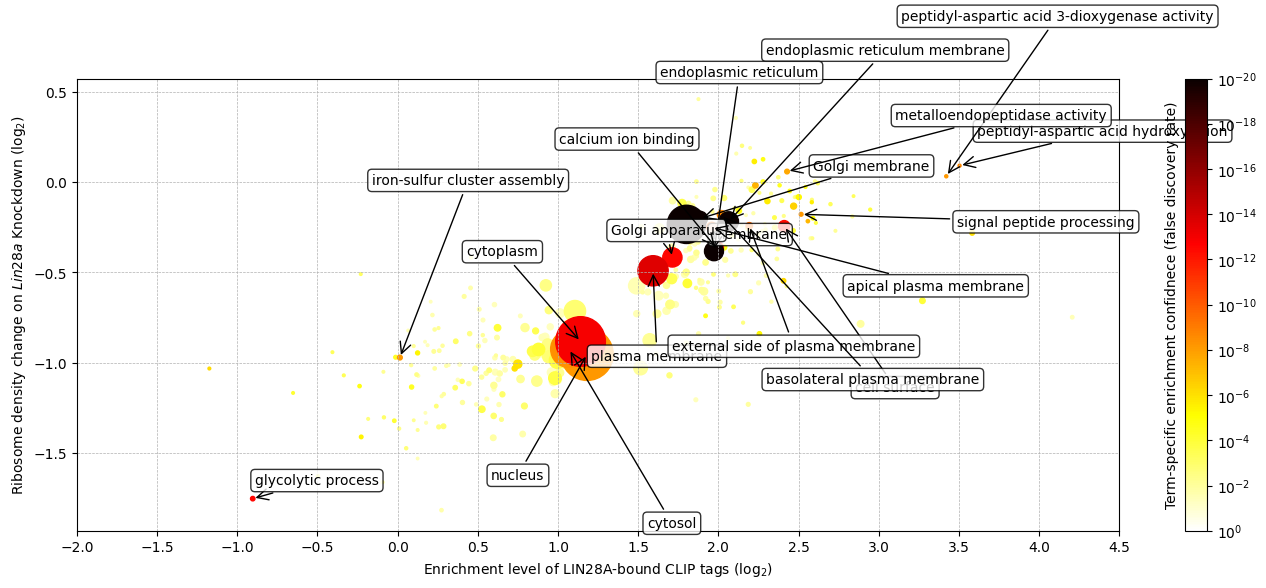

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import seaborn as sns
import random

# 데이터프레임에서 필요한 열 선택
x = np.log2(GO_heatmap_sorted['clip_enrichment_mean'])
y = np.log2(GO_heatmap_sorted['rden_change_mean'])
size = GO_heatmap_sorted['GO_count']/3
color = GO_heatmap_sorted['clip_enrichment_fdr_mean']


# 그래프 그리기
plt.figure(figsize=(14, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10**-20, vmax=10**-0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10**-i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidnece (false discovery rate)')

top_10_indices = np.argsort(color)[:20]
text_positions = []  # 이미 표시된 text의 위치를 저장하는 리스트

for i in top_10_indices:
    go_value = GO_heatmap_sorted.index[i]
    
    # text의 위치를 설정합니다
    x_offset = 0.2 * np.random.uniform(-1, 1)  # x 방향 offset (random)
    y_offset = 0.2 * np.random.uniform(-1, 1)  # y 방향 offset (random)
    
    x_pos = x[i] + x_offset
    y_pos = y[i] + y_offset
    
    # 겹치지 않는 위치를 찾을 때까지 반복합니다
    while True:
        is_overlapping = False
        for pos in text_positions:
            if abs(x_pos - pos[0]) < 0.5 and abs(y_pos - pos[1]) < 0.5:
                is_overlapping = True
                break
        if is_overlapping:
            # 겹치는 경우 새로운 위치를 생성합니다
            x_offset = np.random.uniform(-1, 1)
            y_offset = np.random.uniform(-1, 1)
            
            x_pos = x[i] + x_offset
            y_pos = y[i] + y_offset
        else:
            break
    
    text_positions.append((x_pos, y_pos))
    
    arrowprops = dict(arrowstyle='->', connectionstyle="arc3,rad=0", mutation_scale=20, color='black')
    bbox_props = dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8)
    plt.annotate(go_value, (x[i], y[i]), xytext=(x_pos, y_pos), textcoords='data', arrowprops=arrowprops, bbox=bbox_props)
    
plt.tight_layout()
plt.xticks(np.arange(-2, 5, 0.5))
plt.grid(True, linestyle='--', linewidth=.5)

plt.show()

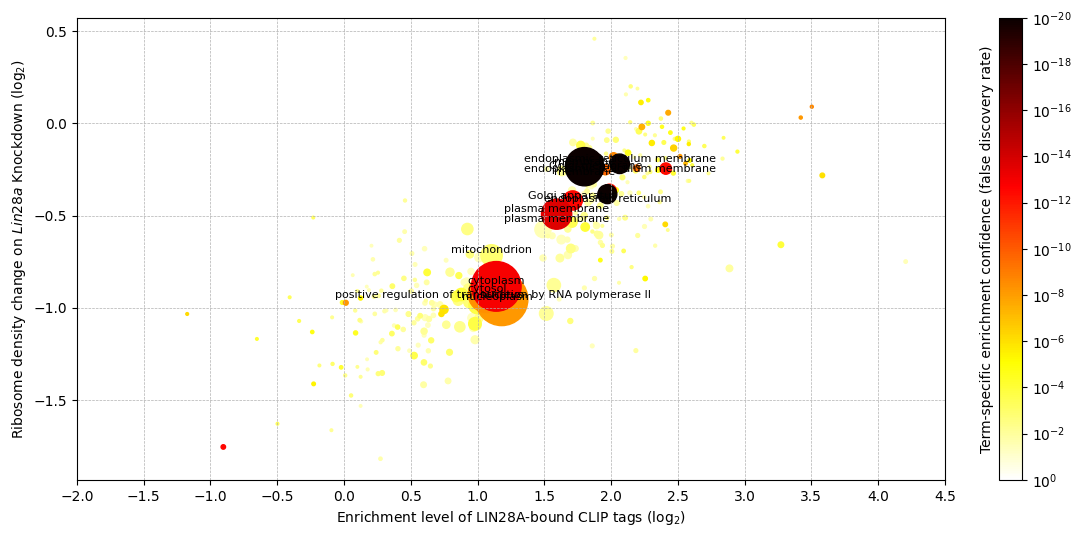

In [304]:
# 그래프 그리기
plt.figure(figsize=(14, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10**-20, vmax=10**-0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10**-i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidence (false discovery rate)')

top_size_indices = np.argsort(size)[-10:]  # size가 가장 큰 10개의 인덱스
top_color_indices = np.argsort(color)[:5]  # color 값이 가장 작은 5개의 인덱스

# size가 가장 큰 10개의 text 표시
for i in top_size_indices:
    go_value = GO_heatmap_sorted.index[i]
    x_pos = x[i]
    y_pos = y[i]
    plt.text(x_pos, y_pos, go_value, ha='center', va='bottom', fontsize=8)

# color 값이 가장 작은 5개의 text 표시
for i in top_color_indices:
    go_value = GO_heatmap_sorted.index[i]
    x_pos = x[i]
    y_pos = y[i]
    plt.text(x_pos, y_pos, go_value, ha='center', va='top', fontsize=8)

plt.xticks(np.arange(-2, 5, 0.5))
plt.grid(True, linestyle='--', linewidth=.5)

plt.show()


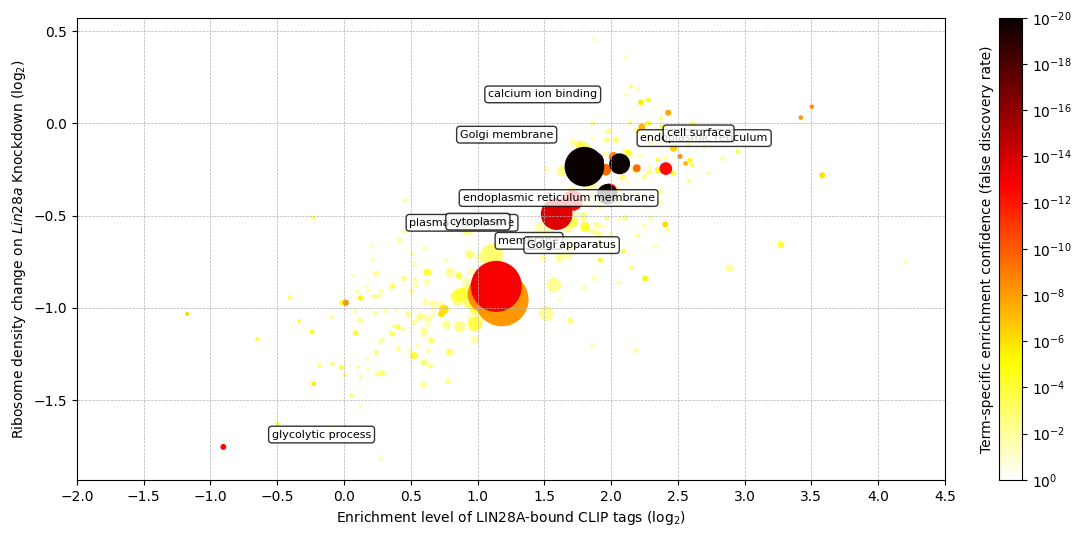

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import random

# 데이터프레임에서 필요한 열 선택
x = np.log2(GO_heatmap_sorted['clip_enrichment_mean'])
y = np.log2(GO_heatmap_sorted['rden_change_mean'])
size = GO_heatmap_sorted['GO_count'] / 3
color = GO_heatmap_sorted['clip_enrichment_fdr_mean']

# 그래프 그리기
plt.figure(figsize=(14, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10 ** -20, vmax=10 ** -0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10 ** -i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidence (false discovery rate)')

# size가 큰 10개와 color 값이 작은 10개의 데이터에 대해 text 표시
top_size_indices = np.argsort(size)[-15:]  # size가 큰 10개의 인덱스
top_color_indices = np.argsort(color)[:10]  # color 값이 작은 10개의 인덱스

for i in top_color_indices:
    go_value = GO_heatmap_sorted.index[i]
    # 텍스트를 표시할 위치 랜덤 생성
    x_offset = random.uniform(-1, 1)
    y_offset = random.uniform(-0.5, 0.5)
    x_pos = x[i] + x_offset
    y_pos = y[i] + y_offset 
    plt.text(x_pos, y_pos, go_value, ha='center', va='bottom', fontsize=8,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))


plt.xticks(np.arange(-2, 5, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

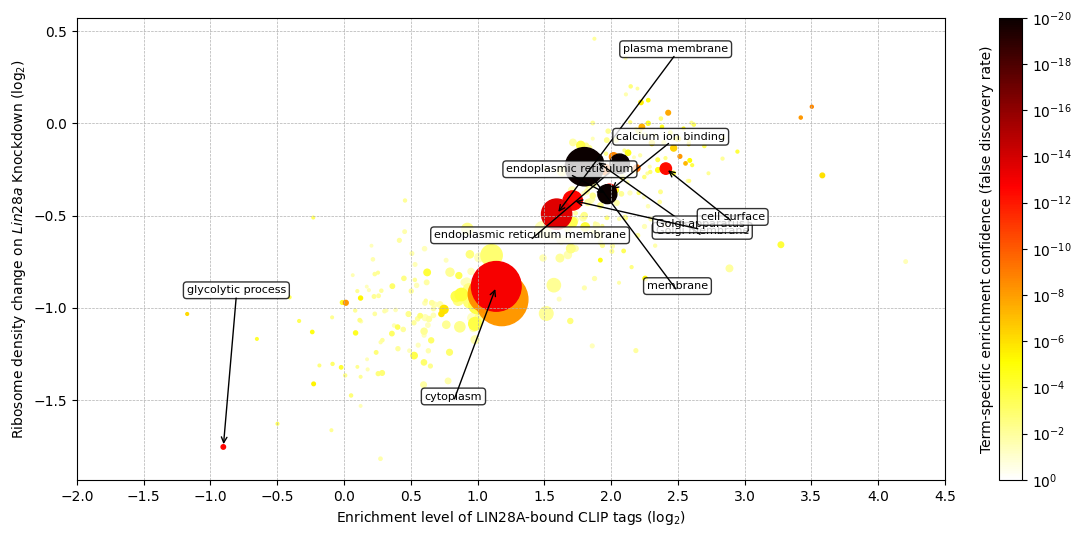

In [332]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import random

# 데이터프레임에서 필요한 열 선택
x = np.log2(GO_heatmap_sorted['clip_enrichment_mean'])
y = np.log2(GO_heatmap_sorted['rden_change_mean'])
size = GO_heatmap_sorted['GO_count'] / 3
color = GO_heatmap_sorted['clip_enrichment_fdr_mean']

# 그래프 그리기
plt.figure(figsize=(14, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10 ** -20, vmax=10 ** -0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10 ** -i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidence (false discovery rate)')

# size가 큰 데이터에 대해 text와 애로우 표시
top_size_indices = np.argsort(color)[:10]  # size가 큰 10개의 인덱스

for i in top_color_indices:
    go_value = GO_heatmap_sorted.index[i]
    # 텍스트를 표시할 위치 랜덤 생성
    x_offset = random.uniform(-1, 1)
    y_offset = random.uniform(-1, 1)
    x_pos = x[i] + x_offset
    y_pos = y[i] + y_offset

    # 텍스트 표시
    plt.text(x_pos, y_pos, go_value, ha='center', va='bottom', fontsize=8,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))

    # 애로우 표시
    arrow_start = (x_pos, y_pos)
    arrow_end = (x[i], y[i])
    plt.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=dict(arrowstyle='->', color='black'))

plt.xticks(np.arange(-2, 5, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

In [ ]:
ㅌ